In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import fetch_openml

import warnings
warnings.simplefilter('ignore')

In [2]:
# 이미지를 읽어서 매트릭스로 바꾸기위해 필요한 모듈
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# class_mode 인자가 sparse이면 라벨인코더로 반환한다
data_generator = ImageDataGenerator( rescale = 1./255)
traingen = data_generator.flow_from_directory('../myimg',target_size = (98,98),
                                             class_mode = 'sparse',
                                             seed = 1
                                             )

Found 32 images belonging to 2 classes.


In [19]:
x_train, y_train = traingen.next()

In [20]:
# (이미지개수, 이미지크기,이미지크기, colordex값  = rgb일경우 3)
#                                                 = greayscale = 1)
# (98,98)크기의 이미지가 3개가겹처서 1개의 이미지가 됨
x_train.shape

(32, 98, 98, 3)

In [21]:
y_train

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

In [22]:
# 원핫인코딩일경우
# cat : [1,0]
# dog : [0,1]
# 라벨인코딩일경우
# cat = 0
# dog = 1
y_train

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

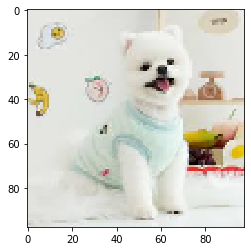

In [37]:
plt.imshow(x_train[0])
plt.show()

In [31]:
model = MLPClassifier( verbose = 1 )

In [33]:
# reshape에서의 -1 값은 98*98*3
x_reshape = x_train.reshape(32,-1)
x_reshape.shape

(32, 28812)

In [34]:
# 지금데이터는 4차원이라 2차원 매트릭스로 줘야한다
model.fit( x_reshape, y_train )

Iteration 1, loss = 0.84443503
Iteration 2, loss = 32.48735774
Iteration 3, loss = 11.40872558
Iteration 4, loss = 6.76982243
Iteration 5, loss = 8.14841605
Iteration 6, loss = 7.50756683
Iteration 7, loss = 6.12564047
Iteration 8, loss = 4.25307509
Iteration 9, loss = 2.06693820
Iteration 10, loss = 0.64580305
Iteration 11, loss = 2.24101761
Iteration 12, loss = 3.20189524
Iteration 13, loss = 3.43324346
Iteration 14, loss = 3.08630217
Iteration 15, loss = 2.26093503
Iteration 16, loss = 1.13232006
Iteration 17, loss = 0.57068655
Iteration 18, loss = 1.29675334
Iteration 19, loss = 1.85028282
Iteration 20, loss = 1.95576298
Iteration 21, loss = 1.65830227
Iteration 22, loss = 1.75514197
Iteration 23, loss = 0.51656018
Iteration 24, loss = 0.74758318
Iteration 25, loss = 1.20867855
Iteration 26, loss = 1.35207519
Iteration 27, loss = 1.14174089
Iteration 28, loss = 0.71474084
Iteration 29, loss = 0.45731041
Iteration 30, loss = 0.64842498
Iteration 31, loss = 0.89194206
Iteration 32, l

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [35]:
model.score( x_reshape, y_train )

1.0

In [36]:
model.predict([x_reshape[0]])

array([1.], dtype=float32)

In [5]:
# 이미지를 읽어오기위한 모듈
from tensorflow.keras.preprocessing import image

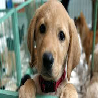

In [6]:
imgData = image.load_img('../image/test.jpg',target_size = (98,98))
imgData

In [7]:
testImg = image.img_to_array( imgData )/255
testImg.shape

(98, 98, 3)

In [11]:
testImg.reshape(1,-1).shape

(1, 28812)

In [8]:
testImg1 = testImg.reshape(1,-1)
testImg1.shape

(1, 28812)

In [55]:
model.predict(testImg)[0]

1.0

## 모델저장


In [48]:
from sklearn.externals import joblib

In [50]:
joblib.dump(model,'catdog.pkl')

['catdog.pkl']

## 모델읽기

In [51]:
# 모델을 읽어와서 다시 사용할수있다
mymodel = joblib.load('catdog.pkl')
mymodel.predict( testImg )

array([1.], dtype=float32)